In [1]:
from __future__ import division
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt

In [ ]:
# Converting excel file to csv file
df = pd.read_excel('../kianadata/2017-pr2-datafiles/2017-pr2-5-trip.xlsx',sheet_name= '5-Trip')
df.to_csv('2017-pr2-5-trip.csv', encoding='utf-8')


In [6]:
df1 = pd.read_excel('../kianadata/2017-pr2-datafiles/2017-pr2-1-household.xlsx',sheet_name= '1-Household')
df1.to_csv('2017-pr2-5-hh.csv', encoding='utf-8')

In [2]:
df = pd.read_csv('2017-pr2-5-trip.csv',skiprows = 1)
df1 = pd.read_csv('2017-pr2-5-hh.csv',skiprows = 1)


/Users/Kiana/miniconda3/envs/python27/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (18,19,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,69,70,81,92,93,94) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# dest_bg = df['d_bg'].unique()
# origin_bg = df['o_bg'].unique()
# dest_rg = df['d_rgcname'].unique()
# origin_rg = df['o_rgcname'].unique()

Shaping carpool policies under rapid motorization: the case of Chinese citiesRui Wang
Different from what was commonly foundin Western cities, the rate of carpooling in Beijing was shown toincrease with income (up to the fourth income quintile) andeducation levels. This isn’t a surprise considering Beijing’s heavilysubsidized transit service and the lower or even middle-incomegroups’ lack of access to cars
Compared with Western cities, carpooling means more privateout-of-pocket cost savings in China. This is because of the highervehicle use cost relative to income and the lower cost to assemblecarpools (e.g. waiting and schedule delay, fuel for driving extradistance to pick up/drop off). By sharing fuel expense, Chinesecarpoolers enjoy roughly nine times as much cost savings ascarpoolers in the US. Fuel cost per 100 vehicle-km in China is aboutf47 for an average car,3which is about three times of theaverage hourly wage of full-time workers in the 36 largestChinese cities(4). In the US, however, driving an average automobilefor 100 km will consume about $7.50’s worth of gasoline,(5) which is less than a third of the average hourly wage of full-timeworkers. In addition, the population densities of Chinese citiesare three to ten times as high as those of typical Westernindustrialized cities (see, e.g.,Kenworthy and Hu, 2002;Bertaudand Malpezzi, 2003). This means shorter distances are driven topick up/drop off carpool riders and fewer schedule delays toassemble carpools. Overall, it does seem that carpool is indeedmore attractive to Chinese urban residents than their Westerncounterparts, even though fuel prices in EU countries are oftenmuch higher than the US.

In [3]:
dfnew = df[['hhid','travelers_total']]
dfnew1 = df1[['hhid','hhincome_detailed']]
dfcarpool1 = dfnew[dfnew['travelers_total'] ==1]
print(dfcarpool1.shape[0])
dfcarpool2 = dfnew[dfnew['travelers_total'] >=2]
print(dfcarpool2.shape[0])
dfcarpool3 = dfnew[dfnew['travelers_total'] >=3]
print(dfcarpool3.shape[0])
dfmergepool1 = dfcarpool1.merge(dfnew1,on = 'hhid')
print(dfmergepool1.shape[0])
dfmergepool2 = dfcarpool2.merge(dfnew1,on = 'hhid') 
print(dfmergepool2.shape[0])
dfmergepool3 = dfcarpool3.merge(dfnew1,on = 'hhid') 
print(dfmergepool3.shape[0])

29010
23079
8664
29010
23079
8664


1     0.021444
2     0.052040
3     0.080413
4     0.133891
5     0.263991
6     0.427040
7     0.678478
8     0.848196
9     0.937238
10    1.000000
Name: hhincome_detailed, dtype: float64
1     0.020383
2     0.055537
3     0.091506
4     0.155388
5     0.308235
6     0.470769
7     0.721500
8     0.868400
9     0.945902
10    1.000000
Name: hhincome_detailed, dtype: float64
1     0.022799
2     0.091236
3     0.142884
4     0.228675
5     0.401921
6     0.560042
7     0.787243
8     0.900144
9     0.954666
10    1.000000
Name: hhincome_detailed, dtype: float64


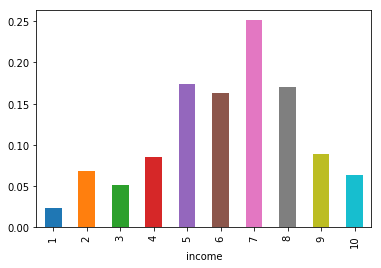

In [4]:
bins = [0,10000,25000,35000,50000,75000,100000,150000,200000,250000]
dfmergepool3 = dfmergepool3[dfmergepool3['hhincome_detailed']<11]
count3 = dfmergepool3['hhincome_detailed'].value_counts()/dfmergepool3['hhincome_detailed'].shape[0]
print(count3.sort_index().cumsum())
count3.sort_index().plot('bar')
text = "capool3+"
plt.xlabel('income')
plt.savefig(text, dpi=100)
dfmergepool2 = dfmergepool2[dfmergepool2['hhincome_detailed']<11]
count2 = dfmergepool2['hhincome_detailed'].value_counts()/dfmergepool2['hhincome_detailed'].shape[0]
print(count2.sort_index().cumsum())
count2.sort_index().plot('bar')
text = "capool2+"
plt.xlabel('income')
plt.savefig(text, dpi=100)

dfmergepool1 = dfmergepool1[dfmergepool1['hhincome_detailed']<11]
count1 = dfmergepool1['hhincome_detailed'].value_counts()/dfmergepool1['hhincome_detailed'].shape[0]
print(count1.sort_index().cumsum())
count1.sort_index().plot('bar')
text = "Single occupancy"
plt.xlabel('income')
plt.savefig(text, dpi=100)

In [5]:
import numpy as np
x = [0,10000,25000,35000,50000,75000,100000,150000,200000,250000]
x = np.arange(1,11)
print(x)
print(count1.sort_index())

[ 1  2  3  4  5  6  7  8  9 10]
1     0.022799
2     0.068436
3     0.051649
4     0.085791
5     0.173246
6     0.158122
7     0.227201
8     0.112901
9     0.054522
10    0.045334
Name: hhincome_detailed, dtype: float64


Text(0.5,0,'Income Group')

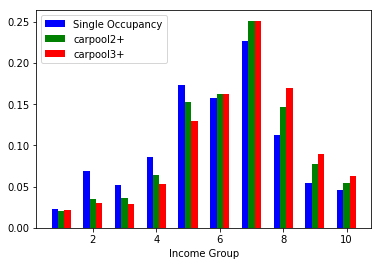

In [6]:
ax = plt.subplot(111)
bar1 = ax.bar(x-0.2,count1.sort_index(),width=0.2, color='b', align='center')
bar2 = ax.bar(x,count2.sort_index(),width=0.2, color='g', align='center')
bar3 = ax.bar(x+0.2,count3.sort_index(),width=0.2, color='r', align='center')
ax.legend((bar1,bar2,bar3),('Single Occupancy','carpool2+','carpool3+'))
plt.xlabel('Income Group')


In [175]:

import array
import math
import cmath
import numpy as np

widths = [10000,15000,10000,15000,25000,25000,50000,50000,50000,0]
def mean_est(sample):
    sample = sample.to_frame()
    sample = sample.transpose()
    # assign households widths and relative frequency
    freq_table = sample.transpose()
    freq_table.columns= ['households'] # renames column
    freq_table["households"] = freq_table.households.astype(int) #county estimates convert households to object - this converts it back to an int
    freq_table = freq_table.assign(width = widths)
    freq_table = freq_table.assign(rel_freq = lambda x: x.households / x.width)
    print(freq_table)
    # initializes arrays with predetermined bin widths and zeros
    slopes = np.zeros([len(widths)-1, 1])
    mean = np.zeros([len(widths), 1])
    mean_num = np.zeros([len(widths), 1])
    mean_den = np.zeros([len(widths), 1])
    y_left = np.empty([len(widths), 1])
    y_right = np.empty([len(widths), 1])
    b = np.empty([len(widths)-1, 1])
    x_left = np.array([0, 10000, 25000, 35000, 50000, 75000, 100000, 150000, 200000, 250000])
    x_mid = np.array([5000, 17500, 30000, 42500, 62500, 87500, 125000, 175000, 225000])
    x_right = np.array([10000, 25000, 35000, 50000, 75000, 100000, 150000, 200000, 250000, 0])
    x_bin = np.array([0,10000, 25000, 35000, 50000, 75000, 100000, 150000, 200000, 250000, 1e7])
    widths_test = [0,10000,15000,10000,15000,25000,25000,50000,50000,50000,0]
    

    # calculates density function of each bin
    closed_brackets = 9
    for i in (range(0,len(freq_table) - 1)):
        print(i)
        print("i",freq_table.iloc[i]["rel_freq"])
        print("i-1",freq_table.iloc[i-1]["rel_freq"])
        print("i+1",freq_table.iloc[i+1]["rel_freq"])
        #for closed brackets, take the average of the slope of the bin before to the current bin and the current bin to the next bin
        if (i == 0):
            slope = 0
        elif (i < closed_brackets - 1) and ((freq_table.iloc[i]["rel_freq"]<freq_table.iloc[i - 1]["rel_freq"]) and (freq_table.iloc[i]["rel_freq"]<freq_table.iloc[i+ 1]["rel_freq"])) | ((freq_table.iloc[i]["rel_freq"]>freq_table.iloc[i - 1]["rel_freq"]) and (freq_table.iloc[i]["rel_freq"]>freq_table.iloc[i+ 1]["rel_freq"])):
            slope = 0
        elif i < closed_brackets - 1:
            slope1 = (freq_table.iloc[i]["rel_freq"] - freq_table.iloc[i - 1]["rel_freq"]) / (x_mid[i] - x_mid[i - 1])
            slope2 = (freq_table.iloc[i + 1]["rel_freq"] - freq_table.iloc[i]["rel_freq"]) / (x_mid[i + 1] - x_mid[i])
            slope = (slope1 + slope2) / 2
            
        #for last closed bracket, take the slope of the bin before to the current bin since there is not next bin
        elif i == closed_brackets - 1:
            slope = (freq_table.iloc[i]["rel_freq"] - freq_table.iloc[i - 1]["rel_freq"]) / (x_mid[i] - x_mid[i - 1]) 
        slopes[i] = slope
        b[i] = freq_table.iloc[i]["rel_freq"] - slope*x_mid[i]
    print("slope",slopes)
    print("b",b)
    print(freq_table.iloc[len(freq_table)-1]["households"])
    alpha = np.log((freq_table["households"].sum() -freq_table.iloc[len(freq_table)-1]["households"])/freq_table["households"].sum() )/np.log(250000/1e7)
    
    print("soorat",np.log(freq_table["households"].sum() -freq_table.iloc[len(freq_table)-1]["households"])/freq_table["households"].sum() )
    print("makhraj",np.log(250000/1e7))
    print(freq_table["households"].sum())
    
    print("checking", (1-np.power(250000/1e7,alpha)))
 
    for i in (range(0,len(freq_table) - 1)):
        x = np.linspace(x_bin[i],x_bin[i+1], 10 , endpoint=True)
        print("parameters",slopes[i],b[i])
        y = slopes[i]*x+b[i]
        ax.plot(x,y,color='b')
    print(x_bin[len(freq_table)-1])
    print(x_bin[len(freq_table)])
    
    x = np.linspace(x_bin[len(freq_table)-1],x_bin[len(freq_table)], 10 , endpoint=True)
    print("x",x)
    y = (alpha*(np.power(x_bin[len(freq_table)-1], alpha))/(np.power(x, alpha+1)))
    print(x)
    print(y)
    ax.plot(x,y,color='b')
    plt.show()
    
    ax1 = plt.subplot(111)
    ylast = 0
    print("plotting_pdf")
    for i in (range(0,len(freq_table) - 1)):
        x = np.linspace(x_bin[i],x_bin[i+1], 10 , endpoint=True)
        print(x_bin[i],x_bin[i+1])
        print("x",x)
        print("parameters",slopes[i],b[i])
        print("checkiiiing", (slopes[i]*x_bin[i]*x_bin[i]+b[i]*x_bin[i]))
        print("hellooo",  np.repeat((slopes[i]*x_bin[i]*x_bin[i]+b[i]*x_bin[i]),10))
        print("heloooo1", slopes[i]*x*x+b[i]*x )
        y =  (slopes[i]*x*x+b[i]*x- np.repeat((slopes[i]*x_bin[i]*x_bin[i]+b[i]*x_bin[i]),10))
        ylast = y[-1]
        print(ylast)
        print("Y",y)
        ax1.plot(x,y,color='b')
    plt.show()
    
#     ax2 = plt.subplot(111) 
#     print("plotting_cdf")
#     ylast = 0
#     for i in (range(0,len(freq_table) - 1)):
#         x = np.linspace(x_bin[i],x_bin[i+1], 10 , endpoint=True)
#         print("parameters",slopes[i],b[i])
#         y = ylast + slopes[i]*x*x*x/3+b[i]*x*x/2
#         ylast =y
#         ax2.plot(x,y,color='b')
#     print(x_bin[len(freq_table)-1])
#     print(x_bin[len(freq_table)])
    
    
    
    
    
#     sumprob = 0
#     for i in range(0,closed_brackets):
#          sumprob =  sumprob + (slopes[i]* math.pow(x_right[i], 3)/3 + slopes[i]* math.pow(x_right[i], 2)
        
    
    
    
    
    
    
    
#     slopes[closed_brackets] = (np.log(1-(freq_table.iloc[closed_brackets]["households"]/freq_table["households"].sum()))/np.log(x_left[closed_brackets]/1e7))
#     print(slopes)


        
        
        
        
#         # calculates y-value of the far left and right of the bin using slope and frequency point
#         y_left[i] = freq_table.iloc[i]["rel_freq"] + slopes[i] * (x_left[i] - x_mid[i])
#         y_right[i] = y_left[i] - slopes[i] * (x_left[i] - x_right[i]) 
        
#         # calculates means from integration
#         mean[i] = ( (slopes[i] / 3) * (math.pow(x_right[i], 3) - math.pow(x_left[i], 3)) + 
#                    ((y_left[i] - (slopes[i] * x_left[i])) / 2) * 
#                    (x_right[i] * x_right[i] - x_left[i] * x_left[i]) ) / np.trapz(np.concatenate([y_left[i], y_right[i]]), [x_left[i], x_right[i]])
#         if math.isnan(mean[i]) | math.isinf(mean[i]):
#             mean[i] = 0
    
#     # appends results to table
#     freq_table = freq_table.assign(slope = slopes)
#     freq_table = freq_table.assign(est_mean = mean)

#     # estimates open bracket top mean
#     total_est_mean = 0
#     # adds all previous closed bracket means
#     for i in range(0, len(freq_table)):
#         if (math.isnan(freq_table.iloc[i]["est_mean"]) == False | math.isinf(freq_table.iloc[i]["est_mean"]) == False):
#             total_est_mean = total_est_mean + (freq_table.iloc[i]["est_mean"] * freq_table.iloc[i]["households"])
#     print(freq_table ["est_mean"])     
#     print( total_est_mean)
            
#     # takes total income (grand_mean * population) and subracts already caluclated means of closed brackets and divides by households in the top
#     # bracket to estimate the top mean
#     top_est_mean = ( (grand_mean * population) -
#                    total_est_mean ) / top_households
    
#     # appends results to table
#     freq_table.loc["inc_200_infk", "est_mean"] = top_est_mean
#     print(freq_table ["est_mean"])
#     #calculates median income
#     freq_table = freq_table.assign(cum_sum = np.cumsum(np.array(freq_table["households"])))
#     cum_sum = np.cumsum(np.array(freq_table["households"]))
        
#     median_household = households / 2
#     index = np.max(np.where(cum_sum < median_household)) + 1
#     diff = cum_sum[index] - median_household

#     constant = y_left[index] - slopes[index] * x_left[index]
    
#     #print(freq_table.iloc[index])
#     #print(cum_sum[index])
#     #print(median_household)
# #     diff = (cum_sum[index] - median_household)
# #     if slopes[index] < 0:
# #         y = y_left[index] - ( diff / households)
# #     else:
# #         y = ( diff / households) - y_left[index]
# #         print(y)
# #     print(y)
# #     x = (y - y_left[index]) / slopes[index] + x_left[index]
# #     print(x)
#     #print("diff",diff)
#     #print("yright",y_right[index])
#     #print(cum_sum[index])
#     #print(median_household)
    
#     a = slopes[index] / ( 2 * households)
#     b = constant / households
#     #c = - ( (slopes[index] * x_left[index] * x_left[index])  / ( 2 * households ) + ( ( constant * x_left[index] ) / households) + ( diff /  freq_table.iloc[index]["households"] ))
#     c = - ( (slopes[index] * (x_left[index] * x_left[index]))  / ( 2 * households ) + ( ( constant * x_left[index] ) / households) + (  )) 
#     d = (b**2) - 4 * a * c
#     sol1 = (-b-math.pow(d, .5))/(2*a)
#     sol2 = (-b+math.pow(d, .5))/(2*a)
#     print(sol1, sol2)    

#     freq_table = freq_table.drop(columns = ["households", "width", "rel_freq", "slope", "cum_sum"])
#     print(freq_table)
#     mean_array = freq_table.transpose()
#     mean_array = np.array(mean_array)
#     mean_array = np.append(mean_array, [[location]], axis = 1) 
    
#     return sample

In [176]:
count1_new = dfmergepool1['hhincome_detailed'].value_counts().sort_index()
count1_sort = count1.sort_index()
print(count1_new)

1      603
2     1810
3     1366
4     2269
5     4582
6     4182
7     6009
8     2986
9     1442
10    1199
Name: hhincome_detailed, dtype: int64


    households  width  rel_freq
1          603  10000  0.060300
2         1810  15000  0.120667
3         1366  10000  0.136600
4         2269  15000  0.151267
5         4582  25000  0.183280
6         4182  25000  0.167280
7         6009  50000  0.120180
8         2986  50000  0.059720
9         1442  50000  0.028840
10        1199      0       inf
0
('i', 0.0603)
('i-1', inf)
('i+1', 0.12066666666666667)
1
('i', 0.12066666666666667)
('i-1', 0.0603)
('i+1', 0.1366)
2
('i', 0.1366)
('i-1', 0.12066666666666667)
('i+1', 0.15126666666666666)
3
('i', 0.15126666666666666)
('i-1', 0.1366)
('i+1', 0.18328)
4
('i', 0.18328)
('i-1', 0.15126666666666666)
('i+1', 0.16728)
5
('i', 0.16728)
('i-1', 0.18328)
('i+1', 0.12018)
6
('i', 0.12018)
('i-1', 0.16728)
('i+1', 0.05972)
7
('i', 0.05972)
('i-1', 0.12018)
('i+1', 0.02884)
8
('i', 0.02884)
('i-1', 0.05972)
('i+1', inf)
('slope', array([[ 0.0000e+00],
       [ 3.0520e-06],
       [ 1.2240e-06],
       [ 1.3870e-06],
       [ 0.0000e+00],
       [-9

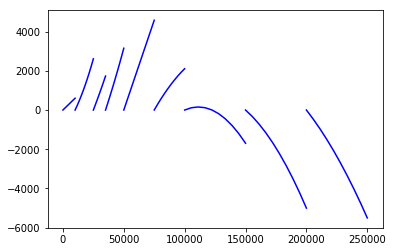

In [177]:
count1_new = pd.DataFrame(count1_new).transpose()
means_estimate = count1_new.apply(lambda x: mean_est(x),axis=1)

In [8]:
# # Dropping NA
# dfnew = df.dropna(subset = {'o_rgcname'})
# dfnew1 = dfnew.dropna(subset = {'d_rgcname'})
# Replacing NA with out
dfnew1 = df.fillna(value = {'o_rgcname' : 'out', 'd_rgcname' : 'out'})


In [9]:
dfnewtemp = dfnew1[['o_rgcname','d_rgcname']]

In [10]:
dfnewtemp.to_csv('tripdata.csv')

In [25]:
print(dest_bg)
print(origin_bg)

[5.30330323e+11 5.30330323e+11 5.30330323e+11 ... 5.30530731e+11
 5.30530611e+11 5.30610416e+11]
[5.30330323e+11 5.30330323e+11 5.30330323e+11 ... 5.30530731e+11
 5.30530611e+11 5.30610416e+11]


In [ ]:
# print(df.set_index('index').count('d_bg'))
# print(df.groupby('d_bg').count())
print(df['d_bg'].value_counts())
d_bg_count = pd.DataFrame(df['d_bg'].value_counts())

In [16]:
d_bg_count.columns

Index(['d_bg'], dtype='object')

In [22]:
d_bg_count['norm']= (d_bg_count['d_bg']/d_bg_count['d_bg'].sum())*100

In [23]:
d_bg_sort =  d_bg_count['norm'].sort_values(ascending = False)

In [30]:
print(d_bg_sort.head(100).sum())

49.16166834926857
